In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.io import read_image
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split

import os, shutil
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def show_image(image, title=None, save_fig=False):
    _, height, width = image.shape
    plt.imshow(image.reshape(height, width), cmap='gray', vmin=0, vmax=255)
    if title:
        plt.title(title)
    if save_fig:
        plt.savefig(f'fig_{title}.png')
    plt.show()

In [ ]:
cells = os.listdir('separated_cells')
len(cells)

516

In [ ]:
from torchvision.io.image import ImageReadMode
class CellsImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(os.listdir(self.img_dir))
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, f'cell_{idx}.png')
        image = read_image(img_path, mode=ImageReadMode.GRAY)
        if transform:
            image = transform(image)
        return image

In [ ]:
train, test = train_test_split(cells, test_size=0.2, shuffle=True)

In [ ]:
transform = transforms.Compose([
    # transforms.Normalize((0.5), (0.5))
])

In [ ]:
cells_dataset = CellsImageDataset(img_dir='separated_cells', transform=transform)
img = cells_dataset.__getitem__(1)

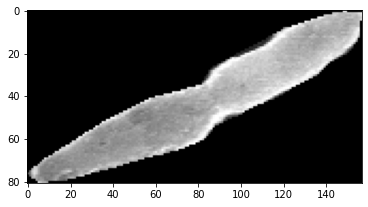

In [ ]:
show_image(img)

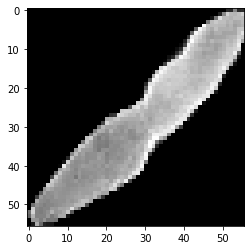

In [ ]:
resize = transforms.Resize(size=(56, 56))
new_img = resize(img)
show_image(new_img)

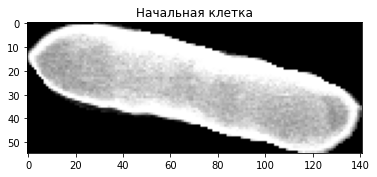

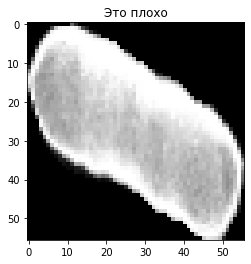

In [ ]:
image_101 = cells_dataset.__getitem__(101)
show_image(image_101, 'Начальная клетка')
resized_101 = resize(image_101)
show_image(resized_101, 'Это плохо')
# plt.imsave('bad.png', resized_101.reshape(56, 56), cmap='gray', vmin=0, vmax=255)

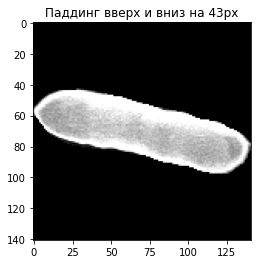

In [ ]:
_, h, w = image_101.shape
padding = transforms.Pad(padding=(0, 43))
padded_101 = padding(image_101)
show_image(padded_101, 'Паддинг вверх и вниз на 43px')

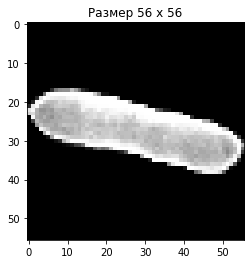

In [ ]:
resized_padded_101 = resize(padded_101)
show_image(resized_padded_101, 'Размер 56 х 56')

In [ ]:
transforms.Compose([]).

{'transforms': []}

In [ ]:
def transform_cell_image(image, size=None):
    _, height, width = image.shape
    if height > width:
        pad_value = (height - width) // 2
        padding = transforms.Pad(padding=(pad_value, 0))
        image = padding(image)
    elif width > height:
        pad_value = (width - height) // 2
        padding = transforms.Pad(padding=(0, pad_value))
        image = padding(image)

    resizing = transforms.Resize(size)
    image = resizing(image)

    return image

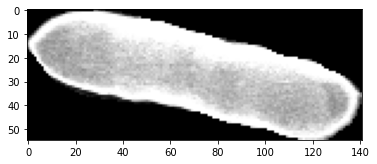

In [ ]:
show_image(image_101)

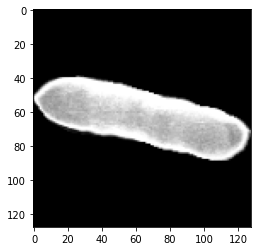

torch.Size([1, 128, 128])

In [ ]:
new = transform_cell_image(image_101, 128)
show_image(new)
new.shape